[View in Colaboratory](https://colab.research.google.com/github/ArunaAkella/AIML/blob/master/Classification_F_MNIST.ipynb)

### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [4]:
tf.__version__

'1.11.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [7]:
print(testY[0:5])

[9 2 1 1 6]


In [20]:
trainX.shape

(60000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Expected Output should look like this

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

9


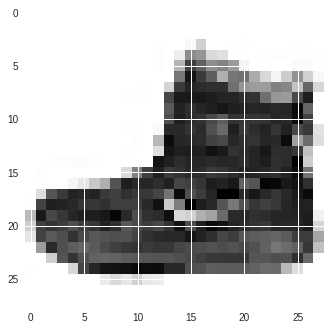

0


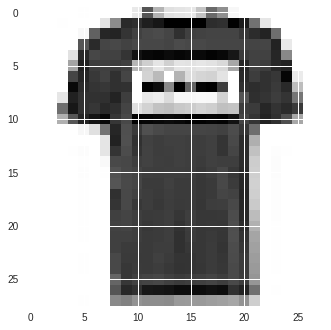

0


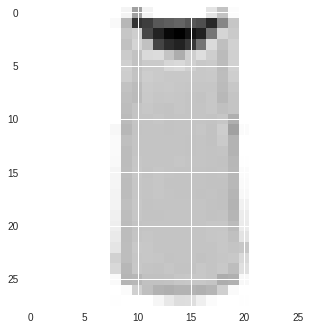

3


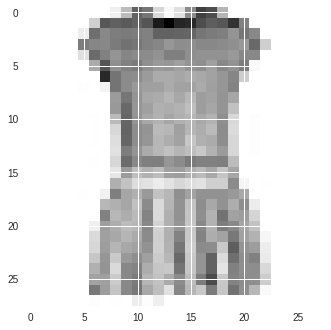

0


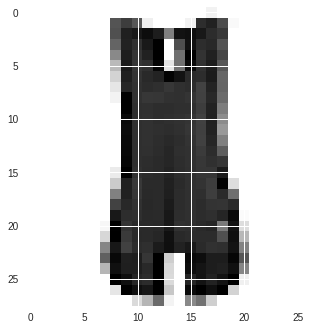

2


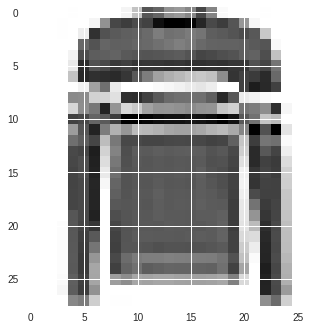

7


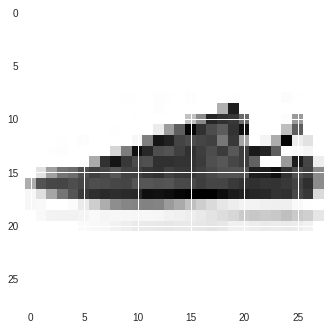

2


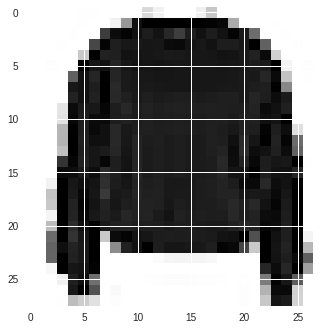

5


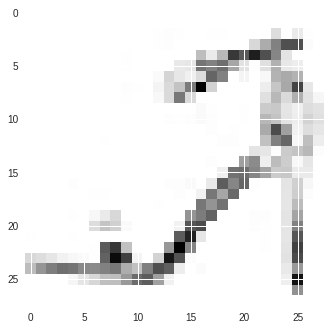

In [44]:
import matplotlib.pyplot as plt
for i in range(0,9):
  plt.imshow(trainX[i])
  print(trainY[i].argmax())
  plt.show()

#### Expected Output

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [14]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 3.0188 - acc: 0.1155 - val_loss: 11.8620 - val_acc: 0.1224
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.7356 - acc: 0.1475 - val_loss: 10.0005 - val_acc: 0.1473
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 2.4986 - acc: 0.1840 - val_loss: 8.5144 - val_acc: 0.1719
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.3002 - acc: 0.2270 - val_loss: 7.2526 - val_acc: 0.1936
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 2.1340 - acc: 0.2717 - val_loss: 6.2114 - val_acc: 0.2146
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.9943 - acc: 0.3145 - val_loss: 5.3906 - val_acc: 0.2396
Epoch 7/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.8764 - acc: 0.3527 - val_loss: 4.7523 - val_a

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [21]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.6954 - acc: 0.7649 - val_loss: 0.9671 - val_acc: 0.7071
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.6924 - acc: 0.7659 - val_loss: 0.9567 - val_acc: 0.7091
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.6894 - acc: 0.7668 - val_loss: 0.9467 - val_acc: 0.7106
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.6865 - acc: 0.7677 - val_loss: 0.9370 - val_acc: 0.7135
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.6837 - acc: 0.7687 - val_loss: 0.9277 - val_acc: 0.7152
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.6810 - acc: 0.7696 - val_loss: 0.9187 - val_acc: 0.7171
Epoch 7/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.6783 - acc: 0.7703 - val_loss: 0.9099 - val_acc

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer= sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/step - loss: 2.7926 - acc: 0.1797 - val_loss: 10.4941 - val_acc: 0.1900
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 2.0819 - acc: 0.3059 - val_loss: 7.5204 - val_acc: 0.2759
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.7122 - acc: 0.4181 - val_loss: 5.6859 - val_acc: 0.3404
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.5065 - acc: 0.4866 - val_loss: 4.6056 - val_acc: 0.3955
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 1.3748 - acc: 0.5337 - val_loss: 3.9148 - val_acc: 0.4423
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.2819 - acc: 0.5669 - val_loss: 3.4422 - val_acc: 0.4780
Epoch 7/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.2117 - acc: 0.5933 - val_loss: 3.0979 - val_ac

### Build the Neural Network model with 3 Dense layers with 30(feel free to play with the no.of neurons and the layers),10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 11,096
Trainable params: 9,528
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [39]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=50,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 1.3337 - acc: 0.6297 - val_loss: 0.9382 - val_acc: 0.6531
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.8582 - acc: 0.6606 - val_loss: 0.8260 - val_acc: 0.6550
Epoch 3/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.7909 - acc: 0.6619 - val_loss: 0.7700 - val_acc: 0.6588
Epoch 4/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.7630 - acc: 0.6653 - val_loss: 0.7583 - val_acc: 0.6639
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.7507 - acc: 0.6639 - val_loss: 0.7551 - val_acc: 0.6727
Epoch 6/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.7431 - acc: 0.6680 - val_loss: 0.7399 - val_acc: 0.6652
Epoch 7/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.7335 - acc: 0.6698 - val_loss: 0.7436 - val_acc